In [1]:
'''
#### these modules are required to run the script
module use /g/data/hh5/public/modules
module load conda/analysis3
source /scratch/nf33/public/hackathon_env/bin/activate
'''

import xarray as xr
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs
import numpy as np
%run ~/hackathon-2025_project/hk25-AusNode-land/analysis/yll_functions.ipynb

In [2]:

# define paths
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'P1D'
zoom = 'z10'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath).sel(time=slice('2020-03','2021-02'))#.sel(time=ds['time'].dt.month.isin([6, 7, 8]))
ds_jja = ds.sel(time=ds['time'].dt.month.isin([6, 7, 8]))

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

'''
#### some variables of interest ####

hflsd: latent heat flux
hfssd: sensible heat flux
huss: specific humidity in 2m
mrso: Water content of soil layers
orog: surface altitude
pr: precipitation flux
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rsus: surface upwelling shortwave radiation
sftlf: cell area fraction occupied by land including lakes
tas: temperature in 2m
tauu: u-momentum flux at the surface
tauv: v-momentum flux at the surface
ts: surface temperature
uas: zonal wind in 10m
vas: meridional wind in 10m
'''


/home/561/yl1269/.local/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/561/yl1269/.local/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


clivi: cloud ice path
clt: total cloud cover
clwvi: cloud condensed water path
egpvi: Atmosphere Geopotential Energy Content
einvi: Atmosphere Moist Internal Energy Content
ekhvi: Atmosphere Horizontal Kinetic Energy Content
ekvvi: Atmosphere Vertical Kinetic Energy Content
hflsd: latent heat flux
hfssd: sensible heat flux
hur: relative humidity
hus: Specific humidity
huss: specific humidity in 2m
mrso: Water content of soil layers
o3vi: ozone path
orog: surface altitude
pr: precipitation flux
prs: large-scale precipitation flux (snow)
prw: water vapor path
ps: surface pressure
psl: mean sea level pressure
qall: mass fraction of all hydrometeors in air
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rlut: toa outgoing longwave radiation
rlutcs: toa outgoing clear-sky longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rs

'\n#### some variables of interest ####\n\nhflsd: latent heat flux\nhfssd: sensible heat flux\nhuss: specific humidity in 2m\nmrso: Water content of soil layers\norog: surface altitude\npr: precipitation flux\nrlds: surface downwelling longwave radiation\nrldscs: surface downwelling clear-sky longwave radiation\nrlus: surface upwelling longwave radiation\nrsds: surface downwelling shortwave radiation\nrsdscs: surface downwelling clear-sky shortwave radiation\nrsus: surface upwelling shortwave radiation\nsftlf: cell area fraction occupied by land including lakes\ntas: temperature in 2m\ntauu: u-momentum flux at the surface\ntauv: v-momentum flux at the surface\nts: surface temperature\nuas: zonal wind in 10m\nvas: meridional wind in 10m\n'

In [3]:
ds_jja.time

<xarray.DataArray 'time' (time: 92)>
array(['2020-06-01T00:00:00.000000000', '2020-06-02T00:00:00.000000000',
       '2020-06-03T00:00:00.000000000', '2020-06-04T00:00:00.000000000',
       '2020-06-05T00:00:00.000000000', '2020-06-06T00:00:00.000000000',
       '2020-06-07T00:00:00.000000000', '2020-06-08T00:00:00.000000000',
       '2020-06-09T00:00:00.000000000', '2020-06-10T00:00:00.000000000',
       '2020-06-11T00:00:00.000000000', '2020-06-12T00:00:00.000000000',
       '2020-06-13T00:00:00.000000000', '2020-06-14T00:00:00.000000000',
       '2020-06-15T00:00:00.000000000', '2020-06-16T00:00:00.000000000',
       '2020-06-17T00:00:00.000000000', '2020-06-18T00:00:00.000000000',
       '2020-06-19T00:00:00.000000000', '2020-06-20T00:00:00.000000000',
       '2020-06-21T00:00:00.000000000', '2020-06-22T00:00:00.000000000',
       '2020-06-23T00:00:00.000000000', '2020-06-24T00:00:00.000000000',
       '2020-06-25T00:00:00.000000000', '2020-06-26T00:00:00.000000000',
       '2020-06-27T00:00:00.000000000', '2020-06-28T00:00:00.000000000',
       '2020-06-29T00:00:00.000000000', '2020-06-30T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-07-02T00:00:00.000000000',
       '2020-07-03T00:00:00.000000000', '2020-07-04T00:00:00.000000000',
       '2020-07-05T00:00:00.000000000', '2020-07-06T00:00:00.000000000',
       '2020-07-07T00:00:00.000000000', '2020-07-08T00:00:00.000000000',
       '2020-07-09T00:00:00.000000000', '2020-07-10T00:00:00.000000000',
       '2020-07-11T00:00:00.000000000', '2020-07-12T00:00:00.000000000',
       '2020-07-13T00:00:00.000000000', '2020-07-14T00:00:00.000000000',
       '2020-07-15T00:00:00.000000000', '2020-07-16T00:00:00.000000000',
       '2020-07-17T00:00:00.000000000', '2020-07-18T00:00:00.000000000',
       '2020-07-19T00:00:00.000000000', '2020-07-20T00:00:00.000000000',
       '2020-07-21T00:00:00.000000000', '2020-07-22T00:00:00.000000000',
       '2020-07-23T00:00:00.000000000', '2020-07-24T00:00:00.000000000',
       '2020-07-25T00:00:00.000000000', '2020-07-26T00:00:00.000000000',
       '2020-07-27T00:00:00.000000000', '2020-07-28T00:00:00.000000000',
       '2020-07-29T00:00:00.000000000', '2020-07-30T00:00:00.000000000',
       '2020-07-31T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-08-02T00:00:00.000000000', '2020-08-03T00:00:00.000000000',
       '2020-08-04T00:00:00.000000000', '2020-08-05T00:00:00.000000000',
       '2020-08-06T00:00:00.000000000', '2020-08-07T00:00:00.000000000',
       '2020-08-08T00:00:00.000000000', '2020-08-09T00:00:00.000000000',
       '2020-08-10T00:00:00.000000000', '2020-08-11T00:00:00.000000000',
       '2020-08-12T00:00:00.000000000', '2020-08-13T00:00:00.000000000',
       '2020-08-14T00:00:00.000000000', '2020-08-15T00:00:00.000000000',
       '2020-08-16T00:00:00.000000000', '2020-08-17T00:00:00.000000000',
       '2020-08-18T00:00:00.000000000', '2020-08-19T00:00:00.000000000',
       '2020-08-20T00:00:00.000000000', '2020-08-21T00:00:00.000000000',
       '2020-08-22T00:00:00.000000000', '2020-08-23T00:00:00.000000000',
       '2020-08-24T00:00:00.000000000', '2020-08-25T00:00:00.000000000',
       '2020-08-26T00:00:00.000000000', '2020-08-27T00:00:00.000000000',
       '2020-08-28T00:00:00.000000000', '2020-08-29T00:00:00.000000000',
       '2020-08-30T00:00:00.000000000', '2020-08-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-08-31
Attributes:
    axis:     T

In [4]:
sm_surf = ds_jja['mrso']#.mean(dim='soil_level')
sm_surf#.soil_level

<xarray.DataArray 'mrso' (time: 92, soil_level: 5, cell: 12582912)>
dask.array<getitem, shape=(92, 5, 12582912), dtype=float32, chunksize=(4, 1, 262144), chunktype=numpy.ndarray>
Coordinates:
  * soil_level  (soil_level) int64 0 0 0 2 6
  * time        (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-08-31
Dimensions without coordinates: cell
Attributes:
    grid_mapping:        crs
    hiopy::time_method:  mean
    hiopy::nnn:          4
    hiopy::enable:       True
    standard_name:       wtr_soil_sl
    units:               m
    short_name:          
    long_name:           Water content of soil layers

In [5]:
sm_surf.mean(dim='time')

<xarray.DataArray 'mrso' (soil_level: 5, cell: 12582912)>
dask.array<mean_agg-aggregate, shape=(5, 12582912), dtype=float32, chunksize=(1, 262144), chunktype=numpy.ndarray>
Coordinates:
  * soil_level  (soil_level) int64 0 0 0 2 6
Dimensions without coordinates: cell

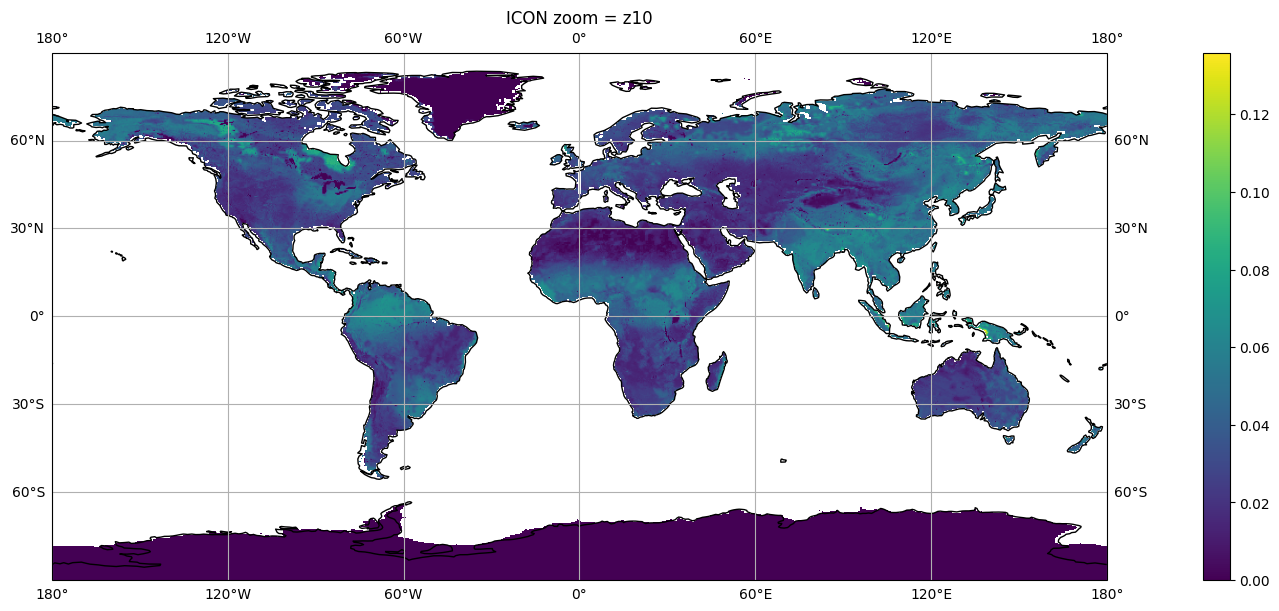

/home/561/yl1269/.local/lib/python3.10/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return

In [6]:
land = ds_jja['sftlf']
sm_surf = ds_jja['mrso'].isel(soil_level=[0,1]).mean(dim='soil_level')
sm_surf = xr.where(land >0.9, sm_surf, np.nan)

plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(sm_surf.mean(dim='time').values,ax=ax)
ax.set_title(f'ICON zoom = {zoom}')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


In [7]:
pr = xr.where(land >0.9, ds_jja['pr'], np.nan)
lh = xr.where(land >0.9, ds_jja['hflsd'], np.nan)
land = ds_jja['sftlf']
sm_surf = ds_jja['mrso']#[:,2,:]#.mean(dim='soil_level')
sm_surf = xr.where(land >0.9, sm_surf, np.nan)
sm_surf

<xarray.DataArray (cell: 12582912, time: 92, soil_level: 5)>
dask.array<where, shape=(12582912, 92, 5), dtype=float32, chunksize=(262144, 4, 1), chunktype=numpy.ndarray>
Coordinates:
  * soil_level  (soil_level) int64 0 0 0 2 6
  * time        (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-08-31
Dimensions without coordinates: cell

In [8]:
sm_surf.mean(dim='time')

<xarray.DataArray (cell: 12582912, soil_level: 5)>
dask.array<mean_agg-aggregate, shape=(12582912, 5), dtype=float32, chunksize=(262144, 1), chunktype=numpy.ndarray>
Coordinates:
  * soil_level  (soil_level) int64 0 0 0 2 6
Dimensions without coordinates: cell

In [9]:
np.arange(len(sm_surf.soil_level))

array([0, 1, 2, 3, 4])

In [10]:
corr_sm_pr=sm_surf.mean(dim='time')*np.nan
corr_sm_lh=sm_surf.mean(dim='time')*np.nan

for i in np.arange(len(sm_surf.soil_level)):
    sm_lv = sm_surf[:,:,i]
    #print(sm_lv)
    corr_sm_pr[:,i]=corr_window(sm_lv, pr, window_x=1, window_y=9).astype(np.float32)
    corr_sm_lh[:,i] = corr_window(sm_lv, -lh, window_x=1, window_y=9).astype(np.float32)
corr_sm_pr

<xarray.DataArray (cell: 12582912, soil_level: 5)>
dask.array<setitem, shape=(12582912, 5), dtype=float32, chunksize=(262144, 1), chunktype=numpy.ndarray>
Coordinates:
  * soil_level  (soil_level) int64 0 0 0 2 6
Dimensions without coordinates: cell

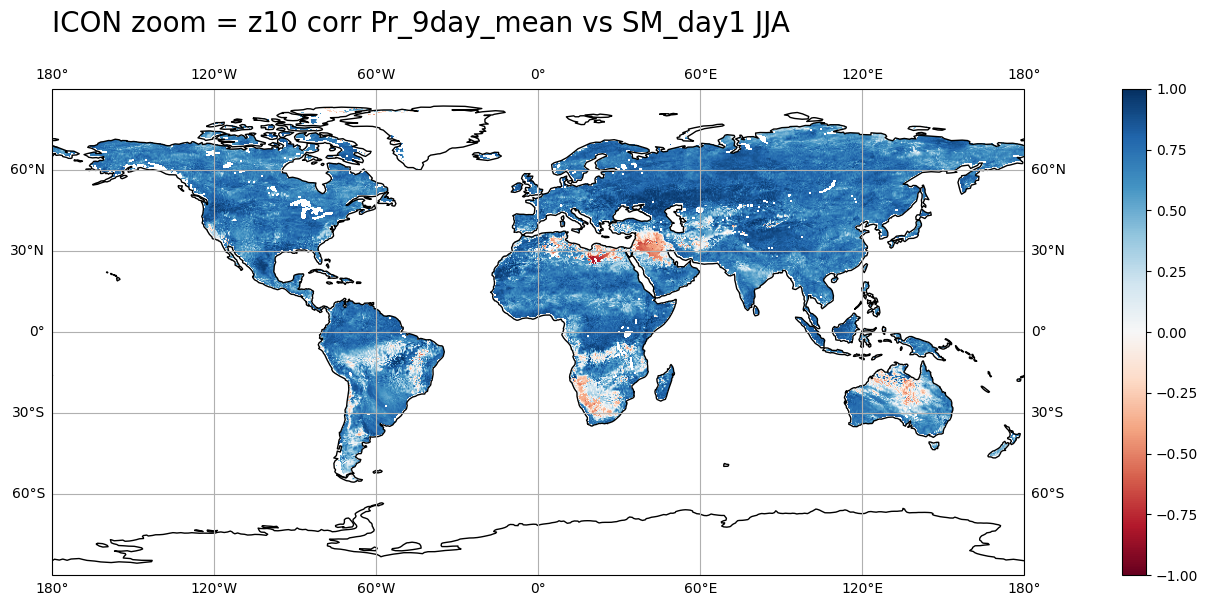

In [11]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(corr_sm_pr.isel(soil_level=0).values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'ICON zoom = {zoom} corr Pr_9day_mean vs SM_day1 JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


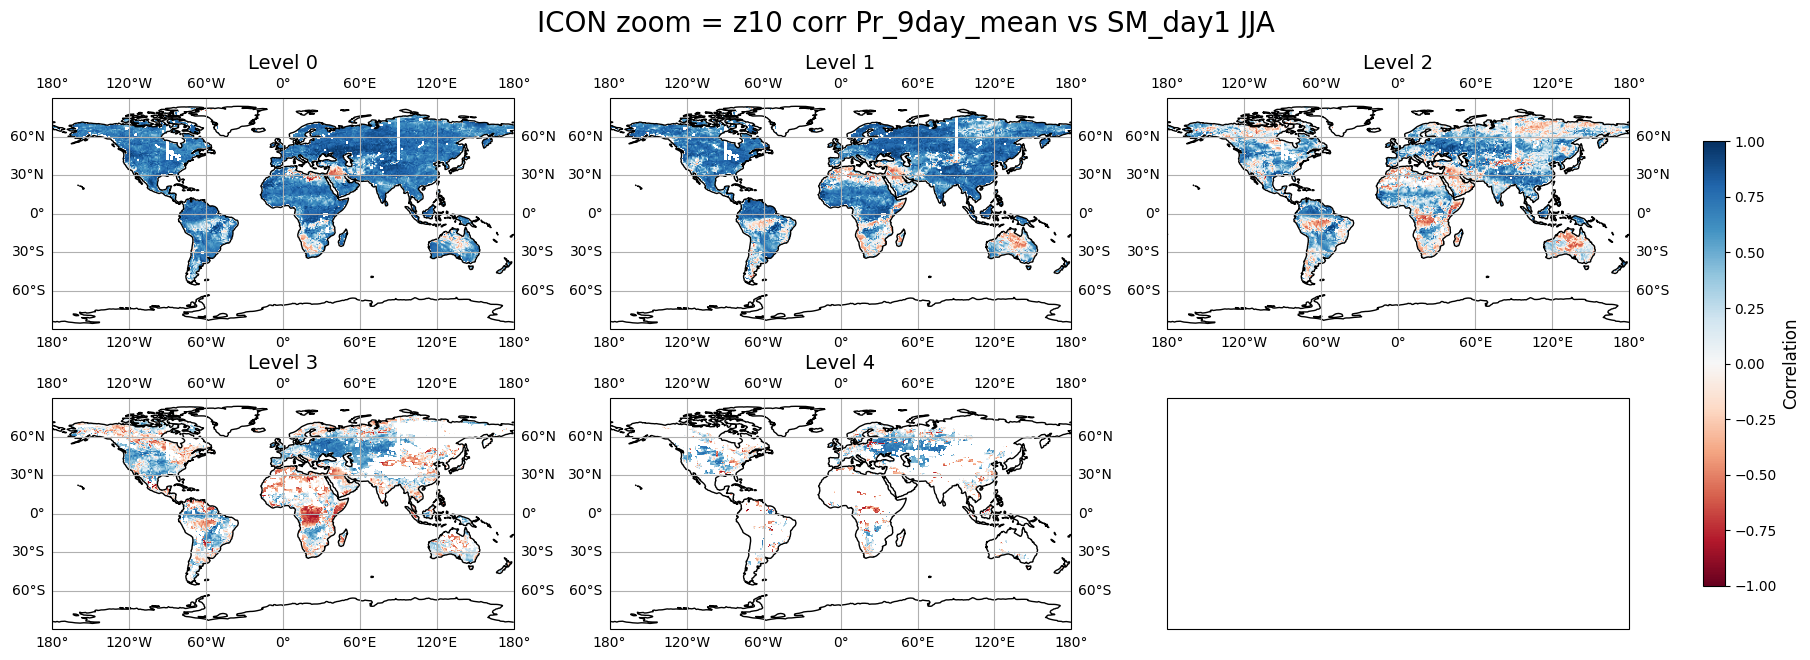

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Close any previous plots
plt.close('all')

# Assuming corr_sm_pr is an xarray.DataArray with dimensions (level, lat, lon)
num_levels = corr_sm_pr.sizes['soil_level']

# Create a panel plot with 2 rows and 3 columns for 6 levels
ncols = 3
nrows = 2
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(18, 6),
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
    layout='constrained'
)

# Flatten axes for easy iteration
axs = axs.ravel()

for i in range(num_levels):
    ax = axs[i]
    ax.set_global()
    im = egh.healpix_show(corr_sm_pr.isel(soil_level=i).values, ax=ax, cmap='RdBu', vmin=-1, vmax=1)
    ax.set_title(f'Level {i}', fontsize=14)
    ax.coastlines()
    ax.gridlines(draw_labels=True)

# Add a colorbar to the right of the figure
cbar = fig.colorbar(im, ax=axs, orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label('Correlation', fontsize=12)

# Optional main title
fig.suptitle(f'ICON zoom = {zoom} corr Pr_9day_mean vs SM_day1 JJA', fontsize=20, y=1.07)

plt.show()

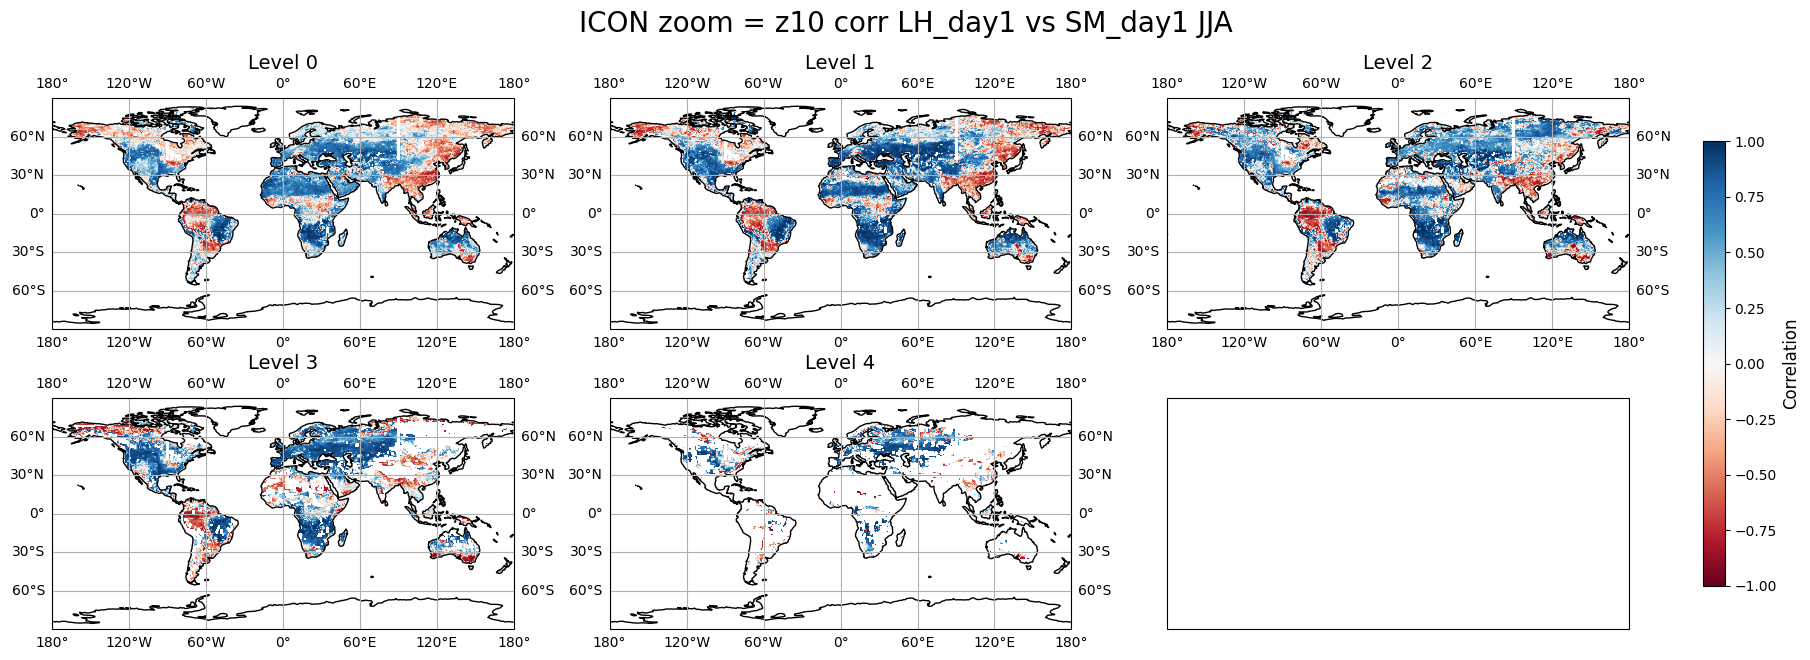

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Close any previous plots
plt.close('all')

# Assuming corr_sm_pr is an xarray.DataArray with dimensions (level, lat, lon)
num_levels = corr_sm_pr.sizes['soil_level']

# Create a panel plot with 2 rows and 3 columns for 6 levels
ncols = 3
nrows = 2
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(18, 6),
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
    constrained_layout=True
)

# Flatten axes for easy iteration
axs = axs.ravel()

for i in range(num_levels):
    ax = axs[i]
    ax.set_global()
    im = egh.healpix_show(corr_sm_lh.isel(soil_level=i).values, ax=ax, cmap='RdBu', vmin=-1, vmax=1)
    ax.set_title(f'Level {i}', fontsize=14)
    ax.coastlines()
    ax.gridlines(draw_labels=True)

# Add a colorbar to the right of the figure
cbar = fig.colorbar(im, ax=axs, orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label('Correlation', fontsize=12)

# Optional main title
fig.suptitle(f'ICON zoom = {zoom} corr LH_day1 vs SM_day1 JJA', fontsize=20, y=1.07)

plt.show()

In [14]:
sm_ann = ds['mrso']
sm_ann
time_step = xr.DataArray(
    np.arange(0, len(sm_ann.time)),
    dims=['time'],
    coords={'time': sm_ann.time})

In [15]:
corr_sm_time=sm_ann.mean(dim='time')*np.nan

for i in np.arange(len(sm_ann.soil_level)):
    sm_ann_lv = sm_ann[:,i,:]
    #print(sm_lv)
    corr_sm_time[i,:]=xr.corr(sm_ann_lv, time_step, dim='time').astype(np.float32)
corr_sm_time

<xarray.DataArray 'mrso' (soil_level: 5, cell: 12582912)>
dask.array<setitem, shape=(5, 12582912), dtype=float32, chunksize=(1, 262144), chunktype=numpy.ndarray>
Coordinates:
  * soil_level  (soil_level) int64 0 0 0 2 6
Dimensions without coordinates: cell

In [16]:
time_step

<xarray.DataArray (time: 365)>
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
       260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285,
       286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311,
       312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324,
       325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337,
       338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
       351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363,
       364])
Coordinates:
  * time     (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2021-02-28

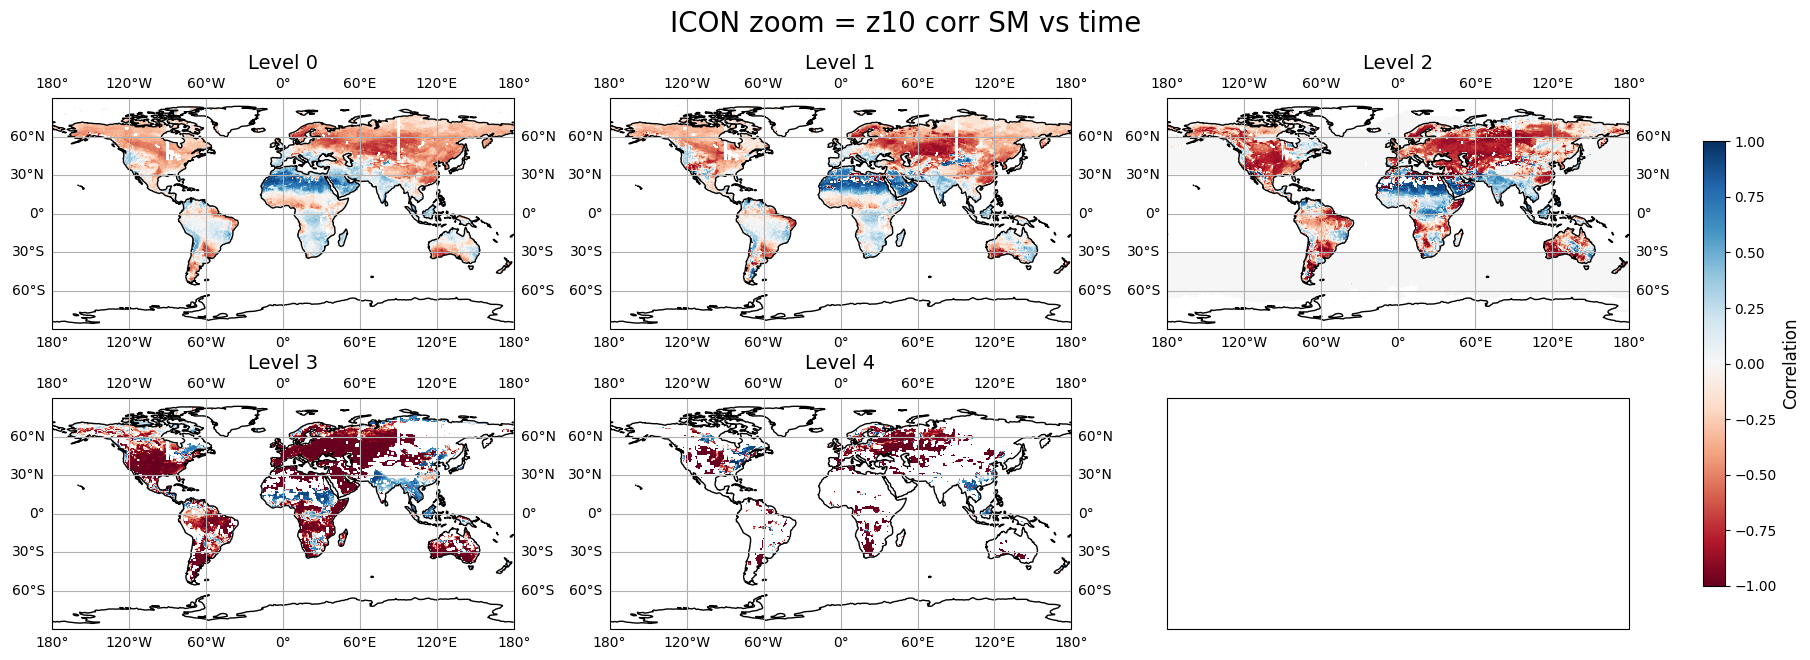

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Close any previous plots
plt.close('all')

# Assuming corr_sm_pr is an xarray.DataArray with dimensions (level, lat, lon)
num_levels = corr_sm_time.sizes['soil_level']

# Create a panel plot with 2 rows and 3 columns for 6 levels
ncols = 3
nrows = 2
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(18, 6),
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
    constrained_layout=True
)

# Flatten axes for easy iteration
axs = axs.ravel()

for i in range(num_levels):
    ax = axs[i]
    ax.set_global()
    im = egh.healpix_show(corr_sm_time.isel(soil_level=i).values, ax=ax, cmap='RdBu', vmin=-1, vmax=1)
    ax.set_title(f'Level {i}', fontsize=14)
    ax.coastlines()
    ax.gridlines(draw_labels=True)

# Add a colorbar to the right of the figure
cbar = fig.colorbar(im, ax=axs, orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label('Correlation', fontsize=12)

# Optional main title
fig.suptitle(f'ICON zoom = {zoom} corr SM vs time', fontsize=20, y=1.07)

plt.show()